In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns   
import math

In [2]:
inf = pd.read_csv('data/Social_Network_Ads.csv')

In [3]:
inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
inf

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
# pick estimated salary vs purchased

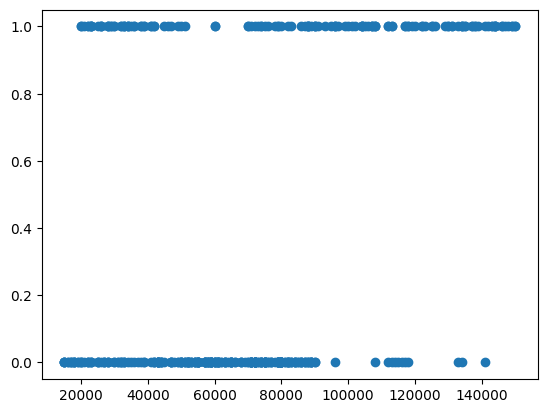

In [6]:
plt.scatter(inf['EstimatedSalary'], inf['Purchased'])

In [7]:
#gradient descent can be used here

In [8]:
Y = inf['Purchased']
X = inf['EstimatedSalary']
mn = X.mean()
st = X.std()
X = (X - X.mean()) / X.std()

def get_p(x, b0, b1):
    return 1/(1 + math.e**-(b0 + b1 * x))
def get_fit(b0, b1):
    return (Y * X.apply(lambda x: math.log(get_p(x, b0, b1))) + Y.apply(lambda x: 1 - x) * X.apply(lambda x: math.log(1 - get_p(x, b0, b1)))).sum()

In [9]:
def errfuncB1(ypr, y, x):
    return ((ypr - y) * x).mean()
def errfuncB0(ypr, y):
    return (ypr - y).mean()

In [10]:
#basically gradient descent where m and c are b0 and b1
#similar to last one that we did

In [11]:
def get_cost(b0, b1):
    return - get_fit(b0, b1) / Y.count()

In [12]:
# get_p(41000, -1.4249999999999999e-05, -0.40287500000000004)

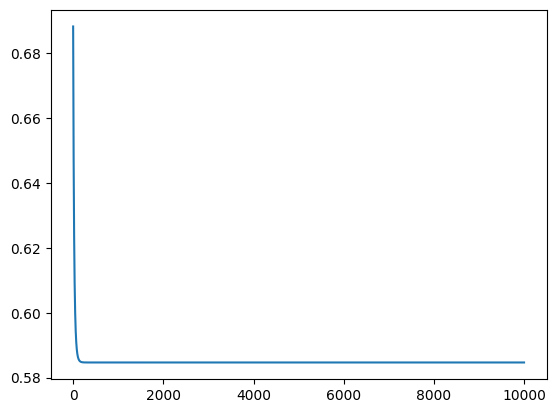

In [20]:
b0 = 0
b1 = 0
alpha = 0.1
costs = []
for i in range(10000):
    #generate ypr
    ypr = get_p(X, b0, b1)
    b1 = b1 - alpha * errfuncB1(ypr, Y, X)
    b0 = b0 - alpha * errfuncB0(ypr, Y)
    rm = get_cost(b0, b1)
    costs.append(rm)
plt.plot(costs)

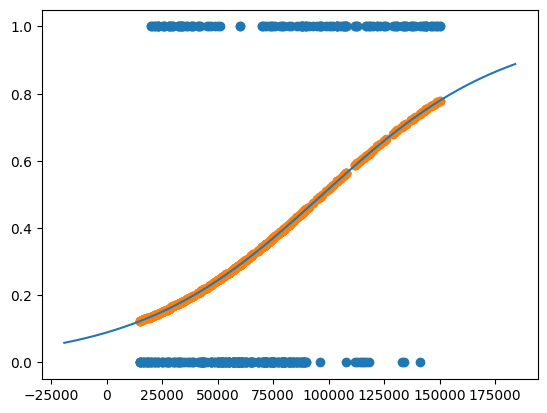

In [47]:
plt.scatter(inf['EstimatedSalary'], inf['Purchased'])
Xline = pd.DataFrame(np.linspace(X.min() - 1, X.max() + 1, num=10000))[0]
Xact = (Xline * st) + mn
ypr = get_p(Xline, b0, b1)
plt.plot(Xact, ypr)
ypr2 = get_p(X, b0, b1)
plt.scatter(inf['EstimatedSalary'], ypr2)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(inf['EstimatedSalary'], inf['Purchased'], test_size=0.25, random_state=0)

In [77]:
logisticRegr = LogisticRegression()
logisticRegr.fit(np.array(inf['EstimatedSalary']).reshape(-1, 1), inf['Purchased'])

LogisticRegression()

In [78]:
y2 = logisticRegr.predict(np.array(x_test).reshape(-1, 1))

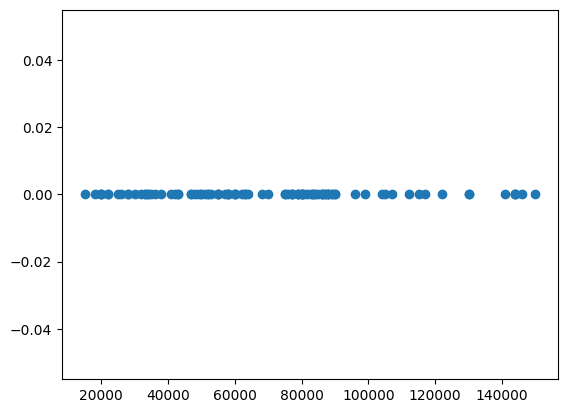

In [79]:
plt.scatter(x_test, y2)

In [80]:
#??

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y2)

array([[68,  0],
       [32,  0]])

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y2)

0.68